Data (.csv) -> MIDI events (.mid) -> Audio (.wav/.mp3) [Load into DAW]

Choose:
-> Mapping (Attribute -> Musical Parameters)
-> Polarity (High nos -> low pitch)
-> Range (Range of notes)
-> Scaling (Mathematical Form of mapping - Linear/Non-Linear)

Choose:
-> Sounds/Instruments
-> Effects
-> Layers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
filename='lunarCraterAges'

In [3]:
path = "D:\\Data Sonification\\Data\\lunarCraterAges.csv"
# filename='lunarCraterAges'
df=pd.read_csv(path)
df.head()

,names,longitude,latitude,diameter,age
0,Copernicus,339.92969,9.63280,96.7,797
1,Tycho,348.71469,-43.25890,85.7,85
2,King,120.49220,4.93750,76.2,992
3,Jackson,196.68950,22.04000,71.4,147
4,Ohm,246.27397,18.28491,64.3,291


In [ ]:
df=df.sort_values(by=['age'], ascending=False)
df.head()

In [4]:
no_rows=len(df)
print(no_rows,'craters')

111 craters


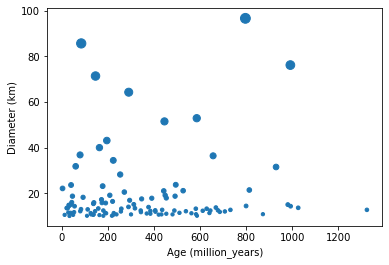

In [6]:
ages=df['age'].values
diameters=df['diameter'].values

plt.scatter(ages,diameters, s=diameters)
plt.xlabel('Age (million_years)')
plt.ylabel('Diameter (km)')
plt.show()


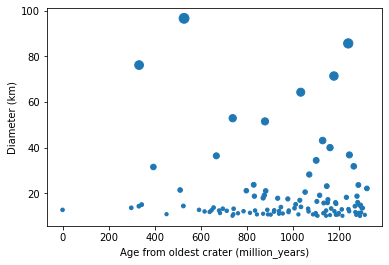

In [8]:
times_myrs=max(ages)-ages

plt.scatter(times_myrs,diameters, s=diameters)
plt.xlabel('Age from oldest crater (million_years)')
plt.ylabel('Diameter (km)')
plt.show()

In [17]:
def map_value(value, min_value, max_value, min_result, max_result):
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

map_value(5,1,10,100,200)

144.44444444444446

In [18]:
#age->time
myrs_per_beat=25
t_data=times_myrs/myrs_per_beat
duration=max(t_data)
print("Duration:",duration,"beats")

Duration: 52.8 beats


In [19]:
t_data

array([21.08, 49.56, 13.28, 47.08, 41.32, 29.52, 35.12, 45.12, 46.4 ,
       49.76, 26.68, 44.  , 50.52, 15.76, 42.8 , 33.16, 51.32, 45.84,
       52.8 , 20.4 , 31.88, 35.24, 42.08, 35.  , 44.6 , 33.28, 51.08,
       49.24, 34.8 , 37.32, 39.08, 46.04, 41.16, 44.12, 51.2 , 47.36,
       45.96, 45.32, 47.44, 40.44, 51.36, 13.72, 51.72, 51.64, 20.96,
       13.24, 50.72, 41.36, 37.88, 26.2 , 11.92, 52.08, 40.24, 51.92,
       46.6 , 27.8 , 29.68, 42.6 , 49.6 , 48.44,  0.  , 23.68, 35.52,
       25.84, 36.72, 27.16, 33.4 , 39.24, 45.72, 28.48, 37.56, 31.4 ,
       47.16, 49.72, 24.64, 42.68, 36.68, 25.52, 39.2 , 50.8 , 51.8 ,
       32.52, 45.4 , 51.4 , 27.32, 43.92, 47.92, 30.44, 45.24, 38.2 ,
       34.8 , 37.56, 18.04, 29.64, 33.72, 35.64, 40.92, 43.44, 47.4 ,
       47.84, 36.12, 47.48, 50.96, 52.44, 44.04, 46.4 , 29.48, 44.24,
       45.72, 48.56, 51.6 ])

In [20]:
duration_beats=52.8
mapped_t_data=map_value(times_myrs,0,max(times_myrs),0,duration_beats)
mapped_t_data

array([21.08, 49.56, 13.28, 47.08, 41.32, 29.52, 35.12, 45.12, 46.4 ,
       49.76, 26.68, 44.  , 50.52, 15.76, 42.8 , 33.16, 51.32, 45.84,
       52.8 , 20.4 , 31.88, 35.24, 42.08, 35.  , 44.6 , 33.28, 51.08,
       49.24, 34.8 , 37.32, 39.08, 46.04, 41.16, 44.12, 51.2 , 47.36,
       45.96, 45.32, 47.44, 40.44, 51.36, 13.72, 51.72, 51.64, 20.96,
       13.24, 50.72, 41.36, 37.88, 26.2 , 11.92, 52.08, 40.24, 51.92,
       46.6 , 27.8 , 29.68, 42.6 , 49.6 , 48.44,  0.  , 23.68, 35.52,
       25.84, 36.72, 27.16, 33.4 , 39.24, 45.72, 28.48, 37.56, 31.4 ,
       47.16, 49.72, 24.64, 42.68, 36.68, 25.52, 39.2 , 50.8 , 51.8 ,
       32.52, 45.4 , 51.4 , 27.32, 43.92, 47.92, 30.44, 45.24, 38.2 ,
       34.8 , 37.56, 18.04, 29.64, 33.72, 35.64, 40.92, 43.44, 47.4 ,
       47.84, 36.12, 47.48, 50.96, 52.44, 44.04, 46.4 , 29.48, 44.24,
       45.72, 48.56, 51.6 ])

In [21]:
mp_myrs_per_beat=max(times_myrs)/duration_beats
print("Million Years per beat:",mp_myrs_per_beat)

Million Years per beat: 25.0


Duration: 52.8 seconds


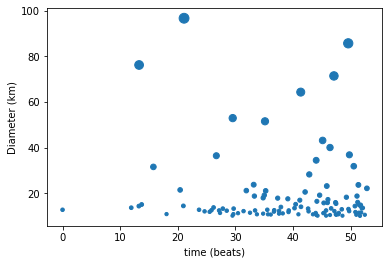

In [22]:
bpm=60
duration_secs=duration_beats*60/bpm
print("Duration:",duration_secs,"seconds")

plt.scatter(mapped_t_data,diameters, s=diameters)
plt.xlabel('time (beats)')
plt.ylabel('Diameter (km)')
plt.show()

In [23]:
y_data=map_value(diameters,min(diameters),max(diameters),0,1)
y_data

array([1.        , 0.87312572, 0.76355248, 0.70818916, 0.62629758,
       0.49480969, 0.47866205, 0.38177624, 0.34602076, 0.30911188,
       0.30449827, 0.28143022, 0.25144175, 0.24798155, 0.20991926,
       0.15801615, 0.15686275, 0.15109573, 0.13956171, 0.13148789,
       0.12802768, 0.12687428, 0.12110727, 0.10495963, 0.10495963,
       0.10034602, 0.10034602, 0.09457901, 0.0911188 , 0.0899654 ,
       0.08650519, 0.08304498, 0.07958478, 0.07381776, 0.06920415,
       0.06805075, 0.06689735, 0.06574394, 0.06228374, 0.05882353,
       0.05882353, 0.05767013, 0.05536332, 0.05190311, 0.05074971,
       0.04959631, 0.04959631, 0.0461361 , 0.0449827 , 0.04267589,
       0.04152249, 0.04036909, 0.03921569, 0.03921569, 0.03806228,
       0.03690888, 0.03690888, 0.03690888, 0.03460208, 0.03344867,
       0.03114187, 0.03114187, 0.03114187, 0.02883506, 0.02883506,
       0.02768166, 0.02768166, 0.02768166, 0.02768166, 0.02652826,
       0.02537486, 0.02422145, 0.02422145, 0.02422145, 0.02306

In [24]:
y_scale=0.5
y_data=y_data**y_scale

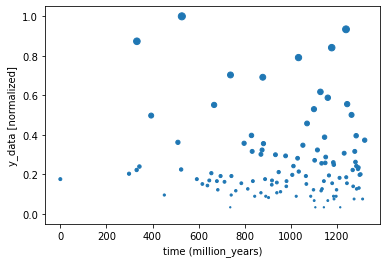

In [25]:
plt.scatter(times_myrs,y_data, s=50*y_data)
plt.xlabel('time (million_years)')
plt.ylabel('y_data [normalized]')
plt.show()

In [26]:
from audiolazy import str2midi #import function to convert note names to midi numbers (could also use: midi2str, str2freq, freq2str,freq2midi,midi2freq) https://pypi.org/project/audiolazy/

note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')

Resolution: 23 notes


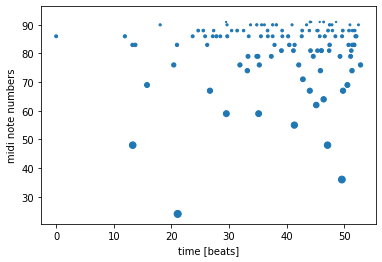

In [27]:
midi_data = []
for i in range(no_rows):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0))
    midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()


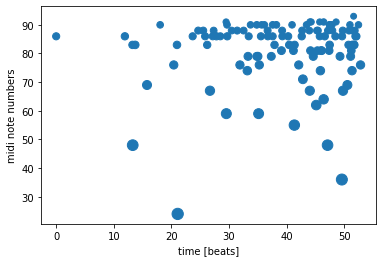

In [28]:
vel_min,vel_max = 35,127

vel_data = []
for i in range(no_rows):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max))
    vel_data.append(note_velocity)
    
plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [31]:
from midiutil import MIDIFile
    
my_midi_file = MIDIFile(1)
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

for i in range(no_rows):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=vel_data[i])

with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f) 

In [32]:
import pygame 

pygame.init()
pygame.mixer.music.load(filename + '.mid')
pygame.mixer.music.play()

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [33]:
pygame.mixer.music.stop()